In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

path1="/content/product data.xlsx"
pdt = pd.read_excel(path1)
columns_to_drop = ['Usage', 'Key Attributes']
pdt = pdt.drop(columns=columns_to_drop)

df = pdt
pdt

,Category,Product Name,Approx. Price (₹),Sold By,Product code
0,Weighing Balance,WENSAR PGB 200,23100,WENSAR,PGB-200
1,Bunsen Burner,Electric Bunsen Burner (with regulator),3600,SIGMA,BB-E01
2,Oven,High Temperature Oven,38000,SIGMA,HTO-450
3,Oven,Vacuum Oven (300x300 mm),74000,SIGMA,VO-300
4,Autoclave,Vertical Autoclave,42000,SIGMA,VA-20SS
5,Autoclave,Double Wall Autoclave 100L,110000,SIGMA,DW-100
6,Mixer,Remi Cyclo Mixer CM 101 Plus,10000,REMI,CM101P
7,Colorimeter,Elico Mild Steel Colorimeter,11800,ELICO,CL-51
8,Spectrophotometer,UV-Visible Spectrophotometer,125000,ELICO,SP-UV1100
9,Centrifuge,General Purpose Centrifuge R-8C,30000,REMI,R8C


In [ ]:
summary_all = pdt.describe().T  # count, mean, std, min, 25%, 50%, 75%, max
summary_all["IQR"] = summary_all["75%"] - summary_all["25%"]
summary_all["skewness"] = pdt.skew(numeric_only=True)
print(summary_all)

                   count          mean           std     min      25%  \
Approx. Price (₹)   17.0  63111.764706  73191.383393  3600.0  18900.0   

                       50%      75%       max      IQR  skewness  
Approx. Price (₹)  32500.0  85000.0  300000.0  66100.0  2.347602  


In [ ]:
path2="/content/Sales data.xlsx"
sales = pd.read_excel(path2)
sales.head()

,Date,Particulars,Credit,Vch No,Product code,Vch Type
0,2024-04-04,Jayam Scientific Company - Coimbatore,5400.0,01/24-25,BB-E01,Sales
1,2024-04-06,SRF Limited (Viralimalai),6000.0,06/24-25,BB-E01,Sales
2,2024-04-11,Geolag International,78490.0,07/24-25,C24BL,Sales
3,2024-04-13,Karunya University - Coimbatore,32000.0,09/24-25,SVP-01,Sales
4,2024-04-18,Accuracy Analabs Pvt Ltd,55000.0,011/24-25,VO-300,Sales


In [ ]:
PRODUCT_PATH = "/content/product data.xlsx"
SALES_PATH = "/content/Cleaned_Sales_Data.xlsx"
OUTPUT_DIR = "/mnt/data/plots"


# --- Load data ---
prod_df = pd.read_excel(PRODUCT_PATH, sheet_name="Product Master")
sales_df = pd.read_excel(SALES_PATH, sheet_name="Sheet1")

# --- Basic cleaning & normalization ---
prod_df.columns = [c.strip() for c in prod_df.columns]
sales_df.columns = [c.strip() for c in sales_df.columns]

sales_df['Product code'] = sales_df['Product code'].astype(str).str.strip()

PRICE_COL = 'Approx. Price (₹)'
prod_df[PRICE_COL] = pd.to_numeric(prod_df[PRICE_COL], errors='coerce')

In [ ]:
# Merging sales with product master
#get Category and Price per product
merged = sales_df.merge(prod_df, left_on='Product code', right_on='Product code', how='left', suffixes=('_sale','_prod'))
merged


,Date,Particulars,Credit,Vch No,Product code,Vch Type,Customer Name,State,Category,Product Name,Approx. Price (₹),Usage,Sold By,Key Attributes
0,2024-04-04,Jayam Scientific Company - Coimbatore,5400.0,01/24-25,BB-E01,Sales,Jayam Scientific Company,Tamil Nadu,Bunsen Burner,Electric Bunsen Burner (with regulator),3600,Flame heating in labs,SIGMA,"Stainless steel, 800°C"
1,2024-04-06,SRF Limited (Viralimalai),6000.0,06/24-25,BB-E01,Sales,SRF Limited,Tamil Nadu,Bunsen Burner,Electric Bunsen Burner (with regulator),3600,Flame heating in labs,SIGMA,"Stainless steel, 800°C"
2,2024-04-11,Geolag International,78490.0,07/24-25,C24BL,Sales,Geolag International,Rajasthan,Centrifuge,Refrigerated Centrifuge C-24BL,85000,Cold centrifugation,REMI,"Max 16000 rpm, -8°C"
3,2024-04-13,Karunya University - Coimbatore,32000.0,09/24-25,SVP-01,Sales,Karunya University,Tamil Nadu,Pump,Single Stage Vacuum Pump,32500,Vacuum generation,SIGMA,"Oil-sealed, 0.05 mbar"
4,2024-04-18,Accuracy Analabs Pvt Ltd,55000.0,011/24-25,VO-300,Sales,Accuracy Analabs Pvt Ltd,Tamil Nadu,Oven,Vacuum Oven (300x300 mm),74000,Vacuum drying,SIGMA,"200°C, 230V"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2025-03-20,Indian Institute of Technology Madras,5500.0,0310/24-25,BB-E01,Sales,Indian Institute of Technology Madras,Tamil Nadu,Bunsen Burner,Electric Bunsen Burner (with regulator),3600,Flame heating in labs,SIGMA,"Stainless steel, 800°C"
134,2025-03-21,Malladi Drugs & Pharmaceuticals Ltd (Tamil Nadu),10000.0,0311/24-25,BB-E01,Sales,Malladi Drugs & Pharmaceuticals Ltd,Tamil Nadu,Bunsen Burner,Electric Bunsen Burner (with regulator),3600,Flame heating in labs,SIGMA,"Stainless steel, 800°C"
135,2025-03-24,Malladi Drugs & Pharmaceuticals Ltd (Renigunta),5000.0,0312/24-25,BB-E01,Sales,Malladi Drugs & Pharmaceuticals Ltd,Andhra Pradesh,Bunsen Burner,Electric Bunsen Burner (with regulator),3600,Flame heating in labs,SIGMA,"Stainless steel, 800°C"
136,2025-03-27,Godrej Consumer Products Ltd (Puducherry ),10450.0,0313/24-25,CM101P,Sales,Godrej Consumer Products Ltd,Puducherry,Mixer,Remi Cyclo Mixer CM 101 Plus,10000,Lab mixing,REMI,"Orbital, 0-2500 rpm"


In [ ]:
product_qty = merged.groupby('Product code').size().rename('Transaction_Count')


In [ ]:
product_sales = merged.groupby('Product code').agg(
    total_sales = (AMOUNT_COL, 'sum'),
    transactions = (AMOUNT_COL, 'count'),
    avg_price_prod = (PRICE_COL, 'first'),  # price from product master
    product_name = ('Product code', 'first'),
    category = ('Category', 'first')
).reset_index()

NameError: name 'AMOUNT_COL' is not defined

In [ ]:
if quantity_col:
    product_sales = product_sales.merge(product_qty.rename('quantity'), left_on='Product code', right_index=True, how='left')
else:
    product_sales = product_sales.rename(columns={'transactions':'transaction_count'})
    product_sales['quantity'] = product_sales['transaction_count']

In [ ]:
prod_agg = product_sales
ps = product_sales
prod_agg

***1.Product Portfolio Analysis & Rationalization***
Goal: Understand categories, diversity, pricing, and redundancy.


Price and Sales Intelligence

In [ ]:
# --- Bubble chart: Avg Price (x) vs Total Sales (y), bubble size ~ quantity ---
x = prod_agg['avg_price_prod']
y = prod_agg['total_sales']
q = prod_agg['quantity']
if q.max() <= 0:
    sizes = np.clip((prod_agg['transactions']/prod_agg['transactions'].max())*500 + 20, 20, 1200)
else:
    sizes = np.clip((q / (q.max())) * 1200 + 30, 30, 4000)

plt.figure(figsize=(11,7))
plt.scatter(x, y, s=sizes)
plt.xlabel("Average Price (₹)")
plt.ylabel("Total Sales (₹)")
plt.title("Bubble Chart: Avg Price vs Total Sales")
plt.grid(True)
# annotate top 8 products by sales
top8 = prod_agg.sort_values('total_sales', ascending=False).head(8)
for _, r in top8.iterrows():
    plt.annotate(str(r.name) if 'Product code' not in r else str(r['Product code']), (r['avg_price_prod'], r['total_sales']),
                 textcoords="offset points", xytext=(0,6), ha='center', fontsize=8)
plt.tight_layout()
plt.show()


3. Customer & Sales Intelligence
3.1 Customer Segmentation
Top Customers by Sales Value:
Plot: Bar chart (Top 10 customers by Credit value).
Insight: Identify high-value customers for relationship building.
Top Customers by Number of Transactions:
Plot: Horizontal bar chart (# transactions per customer).
Insight: Customers buying frequently vs. in bulk.



In [ ]:
# --- 3) Top Customers by Sales Value and by Transaction Count ---
# Determine customer identifier column - try 'Particulars' or 'Customer' etc.
cust_col = None
for candidate in ['Customer Name', 'Party', 'Client', 'Account']:
    if candidate in sales_df.columns:
        cust_col = candidate
        break
if cust_col is None:
    raise ValueError("No customer column found in sales data (tried Particulars, Customer, Party, Client).")

cust_agg = merged.groupby(cust_col).agg(
    total_sales = (AMOUNT_COL, 'sum'),
    transactions = (AMOUNT_COL, 'count')
).sort_values('total_sales', ascending=False)

top_k = 10
# Top by sales value
top_by_sales = cust_agg.head(top_k).reset_index()
plt.figure(figsize=(6,4))
plt.barh(top_by_sales[cust_col].astype(str)[::-1], top_by_sales['total_sales'][::-1])
plt.xlabel("Total Sales (₹)")
plt.title(f"Top {top_k} Customers by Total Sales")
plt.tight_layout()
plt.show()


In [ ]:
# Top by transaction count
top_by_tx = cust_agg.sort_values('transactions', ascending=False).head(top_k).reset_index()
plt.figure(figsize=(6,4))
plt.barh(top_by_tx[cust_col].astype(str)[::-1], top_by_tx['transactions'][::-1])
plt.xlabel("Number of Transactions")
plt.title(f"Top {top_k} Customers by Transaction Count")
plt.tight_layout()
plt.show()

3.2 Time Series Analysis

Monthly Sales Trends:

Plot: Line chart of Total Sales Value by Month.

Insight: Identify peak and low sales cycles for forecasting.



In [ ]:
cust_col = None
for candidate in ['Particulars', 'Customer Name', 'Party', 'Client', 'Account']:
    if candidate in sales_df.columns:
        cust_col = candidate
        break
if cust_col is None:
    raise ValueError("No customer column found in sales data (tried Particulars, Customer, Party, Client).")

cust_agg = merged.groupby(cust_col).agg(
    total_sales = (AMOUNT_COL, 'sum'),
    transactions = (AMOUNT_COL, 'count')
).sort_values('total_sales', ascending=False)

top_k = 10
# --- 4) Time Series: monthly total sales and category-wise stacked area ---
sales_ts = merged.copy()
sales_ts['year_month'] = sales_ts[date_col].dt.to_period('M').dt.to_timestamp()
monthly_total = sales_ts.groupby('year_month')[AMOUNT_COL].sum().reset_index().sort_values('year_month')

# Monthly total sales line
plt.figure(figsize=(8,5))
plt.plot(monthly_total['year_month'], monthly_total[AMOUNT_COL], marker='o')
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

FINAL REPORTING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- LOAD DATA -------------------
product_df = pd.read_excel("product data.xlsx")
sales_df = pd.read_excel("Cleaned_Sales_Data.xlsx")

# Merge sales with product master using Product Code
df = sales_df.merge(product_df, on="Product code", how="left")

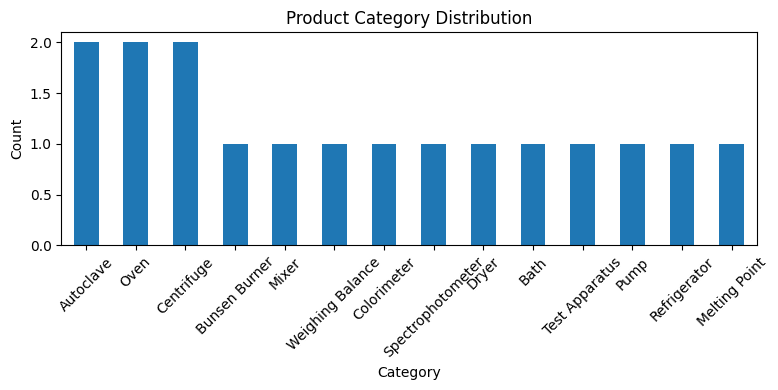

In [ ]:
# ------------------- CATEGORY DISTRIBUTION -------------------
product_df = pd.read_excel("product data.xlsx")
sales_df = pd.read_excel("Cleaned_Sales_Data.xlsx")

# Merge sales with product master using Product Code
df = sales_df.merge(product_df, on="Product code", how="left")

# ------------------- CATEGORY DISTRIBUTION -------------------
cat_counts = product_df['Category'].value_counts()

plt.figure(figsize=(8,4))
cat_counts.plot(kind='bar')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


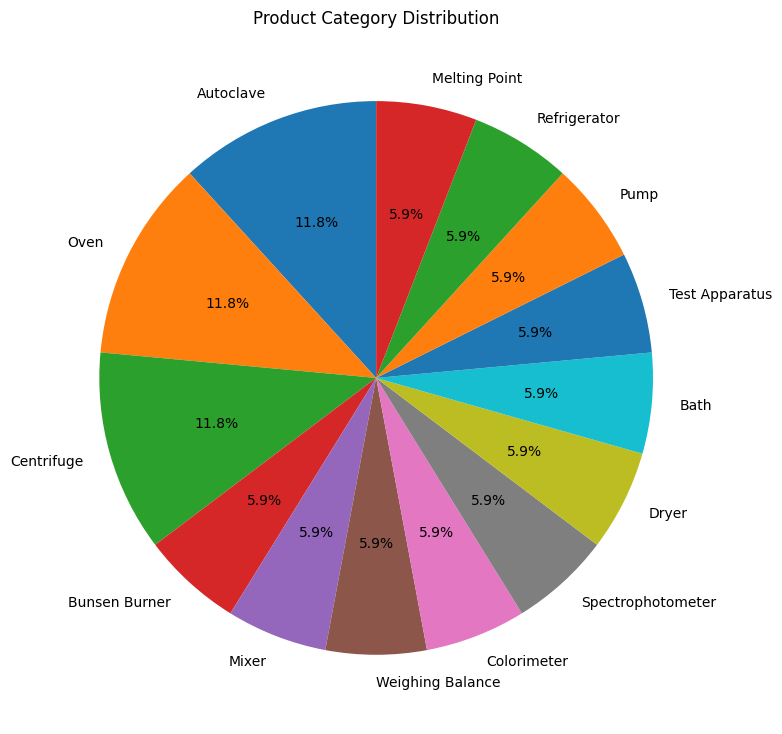

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------- CATEGORY DISTRIBUTION -------------------
product_df = pd.read_excel("product data.xlsx")
sales_df = pd.read_excel("Cleaned_Sales_Data.xlsx")

# Merge sales with product master using Product Code
df = sales_df.merge(product_df, on="Product code", how="left")

# ------------------- CATEGORY DISTRIBUTION -------------------
cat_counts = product_df['Category'].value_counts()

# Change figure size to be square for a circle shape
plt.figure(figsize=(8, 8))

# Plotting the pie chart
cat_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  # Add percentage labels
    startangle=90,      # Rotate the start angle
    legend=False        # Often cleaner without a legend for pie charts
)

plt.title("Product Category Distribution")
plt.ylabel("")  # Removes the default 'Category' label on the y-axis
plt.tight_layout()
plt.show()

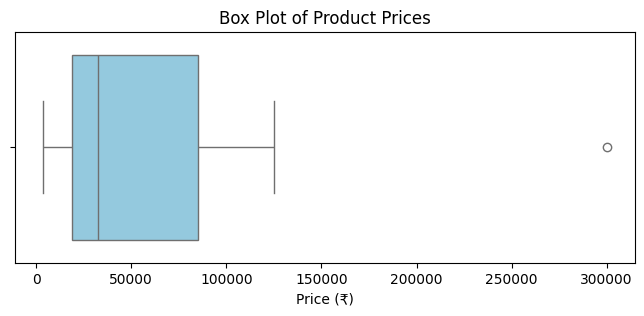

In [ ]:
# ------------------- PRICE SPREAD (BOX PLOT) -------------------
prices = product_df["Approx. Price (₹)"].dropna()

plt.figure(figsize=(8,3))
sns.boxplot(x=prices, color="skyblue")
plt.title("Box Plot of Product Prices")
plt.xlabel("Price (₹)")
plt.show()


In [ ]:
summary_all = product_df.describe().T  # count, mean, std, min, 25%, 50%, 75%, max
summary_all["IQR"] = summary_all["75%"] - summary_all["25%"]
summary_all["skewness"] = product_df.skew(numeric_only=True)
print(summary_all)

                   count          mean           std     min      25%  \
Approx. Price (₹)   17.0  63111.764706  73191.383393  3600.0  18900.0   

                       50%      75%       max      IQR  skewness  
Approx. Price (₹)  32500.0  85000.0  300000.0  66100.0  2.347602  


Quantity Column Detected: None


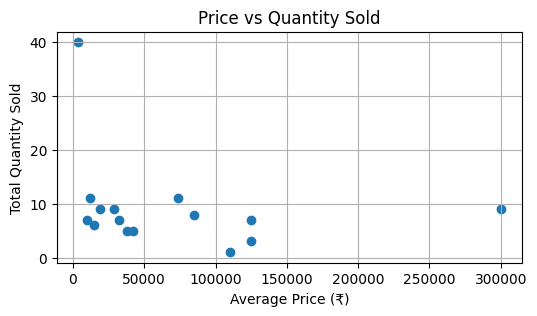

In [ ]:
# ------------------- PRICE vs QUANTITY CORRELATION -------------------
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
product_df = pd.read_excel("product data.xlsx")
sales_df = pd.read_excel("Cleaned_Sales_Data.xlsx")

# Auto-detect quantity column
qty_col = None
for col in sales_df.columns:
    if "qty" in col.lower() or "quantity" in col.lower():
        qty_col = col
        break

print("Quantity Column Detected:", qty_col)

# If no quantity column exists, set quantity = 1
if qty_col is None:
    sales_df["Quantity"] = 1
else:
    sales_df["Quantity"] = sales_df[qty_col]

# Merge sales and product master
df = sales_df.merge(product_df, on="Product code", how="left")

# Compute Sales Value
df["Sales_Value"] = df["Quantity"] * df["Approx. Price (₹)"]

# Aggregate per product
prod_agg = df.groupby("Product code").agg({
    "Approx. Price (₹)": "mean",
    "Quantity": "sum"
}).rename(columns={"Approx. Price (₹)": "avg_price"})

# Plot scatter chart: Price vs Quantity
plt.figure(figsize=(6,3))
plt.scatter(prod_agg["avg_price"], prod_agg["Quantity"])
plt.title("Price vs Quantity Sold")
plt.xlabel("Average Price (₹)")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
x = prod_agg["avg_price"]
y = prod_agg["Quantity"]
x_mean = x.mean()
y_mean = y.mean()
x_dev = x - x_mean
y_dev = y - y_mean
numerator = (x_dev * y_dev).sum()
denom_x = np.sqrt((x_dev**2).sum())
denom_y = np.sqrt((y_dev**2).sum())
r = numerator / (denom_x * denom_y)
print(f"Calculation r: {r}")

Calculation r: -0.24250032010317893



--- Product-level counts (top 10) ---
Product code  avg_price          Category  total_count
      BB-E01       3600     Bunsen Burner           40
      VO-300      74000              Oven           11
       CL-51      11800       Colorimeter           11
       JTA-4      29000    Test Apparatus            9
     LR-1355     300000      Refrigerator            9
       UB-3L      18900              Bath            9
       C24BL      85000        Centrifuge            8
      SVP-01      32500              Pump            7
      CM101P      10000             Mixer            7
       TD-12     125000             Dryer            7
      MP-300      15000     Melting Point            6
     VA-20SS      42000         Autoclave            5
     HTO-450      38000              Oven            5
   SP-UV1100     125000 Spectrophotometer            3
      DW-100     110000         Autoclave            1

--- Category-level counts (all categories) ---
         Category  category_total

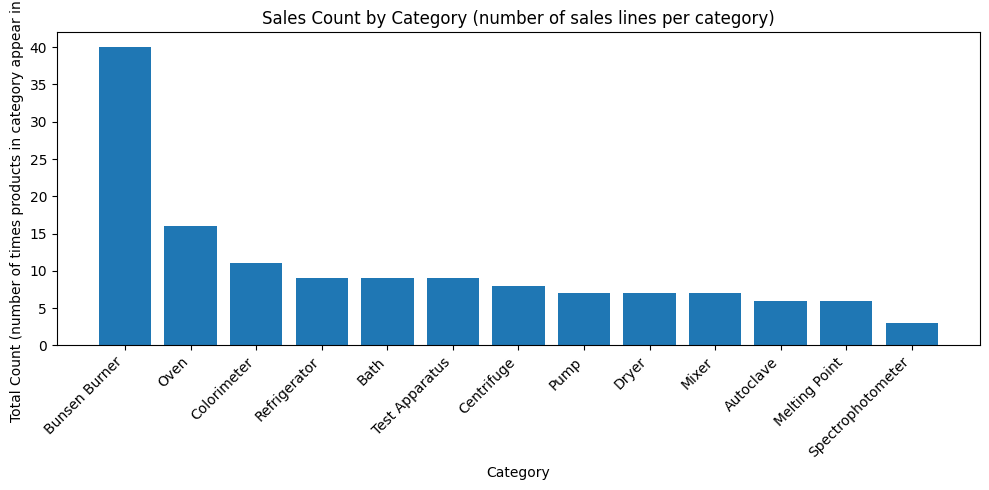

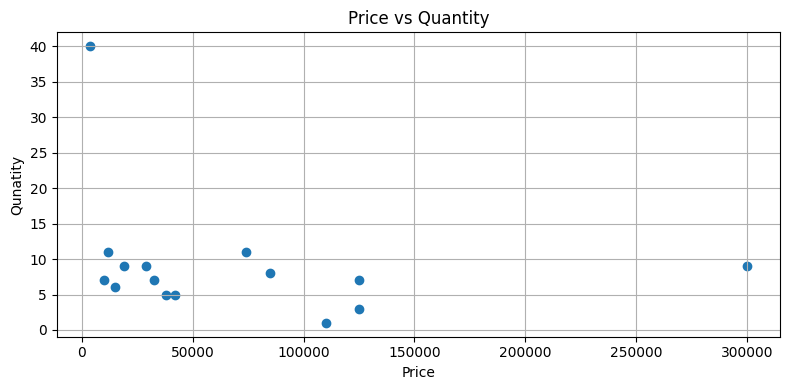

In [ ]:
# ------------------- COUNT BASED: PRODUCT & CATEGORY -------------------
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
product_df = pd.read_excel("product data.xlsx")
sales_df = pd.read_excel("Cleaned_Sales_Data.xlsx")

# Clean column names
product_df.columns = product_df.columns.str.strip()
sales_df.columns = sales_df.columns.str.strip()

# Ensure product code column exists
if "Product code" not in sales_df.columns or "Product code" not in product_df.columns:
    raise ValueError("Expected 'Product code' column in both files. Columns sales_df: {}, product_df: {}".format(
        list(sales_df.columns), list(product_df.columns)
    ))

# 1) Create counts by product from sales (count occurrences of Product code)
product_counts = (
    sales_df["Product code"]
    .value_counts(dropna=True)
    .rename_axis("Product code")
    .reset_index(name="total_count")
)

# 2) Merge counts with product master to get Category and Price
prod_with_meta = product_counts.merge(product_df, on="Product code", how="left")

# If your product master uses a different price column name, change this variable
price_col = "Approx. Price (₹)"
if price_col not in prod_with_meta.columns:
    # try to find a plausible price column
    possible_price_cols = [c for c in prod_with_meta.columns if "price" in c.lower() or "approx" in c.lower()]
    if possible_price_cols:
        price_col = possible_price_cols[0]
    else:
        # no price column found — we will still continue without price
        price_col = None

# Rename price column in the merged df if present for convenience
if price_col:
    prod_with_meta = prod_with_meta.rename(columns={price_col: "avg_price"})
else:
    prod_with_meta["avg_price"] = pd.NA

# 3) Category-level aggregation (sum of counts per category)
if "Category" in prod_with_meta.columns:
    category_counts = (
        prod_with_meta
        .groupby("Category", dropna=False)["total_count"]
        .sum()
        .sort_values(ascending=False)
        .reset_index(name="category_total_count")
    )
else:
    # If no Category column exists in product master, notify and skip category-level
    category_counts = pd.DataFrame({
        "Category": [],
        "category_total_count": []
    })

# 4) Show outputs
print("\n--- Product-level counts (top 10) ---")
print(prod_with_meta[["Product code", "avg_price", "Category", "total_count"]].sort_values("total_count", ascending=False).to_string(index=False))

print("\n--- Category-level counts (all categories) ---")
print(category_counts.to_string(index=False))

# 5) Plots
# 5a: Bar chart for category distribution (counts)
if not category_counts.empty:
    plt.figure(figsize=(10,5))
    plt.bar(category_counts["Category"].astype(str), category_counts["category_total_count"])
    plt.title("Sales Count by Category (number of sales lines per category)")
    plt.xlabel("Category")
    plt.ylabel("Total Count (number of times products in category appear in sales)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Category counts not available (no 'Category' column in product master).")

# 5b: Scatter plot Price vs Count (product-level)
# Only plot if price is available
if prod_with_meta["avg_price"].notna().any():
    plt.figure(figsize=(8,4))
    # convert price to numeric if needed
    prod_with_meta["avg_price"] = pd.to_numeric(prod_with_meta["avg_price"], errors="coerce")
    plt.scatter(prod_with_meta["avg_price"], prod_with_meta["total_count"])
    plt.title("Price vs Quantity")
    plt.xlabel("Price")
    plt.ylabel("Qunatity")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("avg_price not available, skipping Price vs Count scatter plot.")


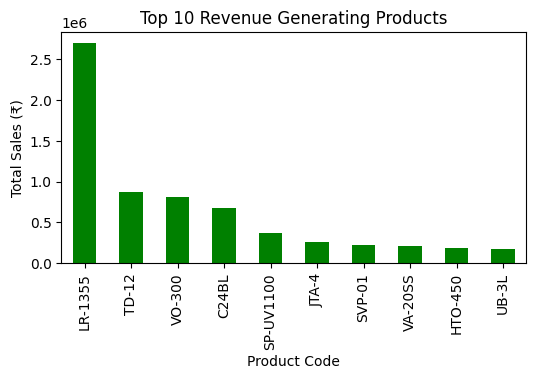

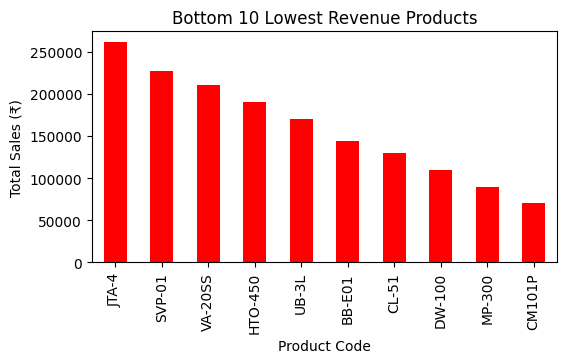

In [ ]:
# ------------------- HIGH-VALUE vs LOW-VALUE PRODUCTS -------------------
sales_by_product = df.groupby("Product code")["Sales_Value"].sum().sort_values(ascending=False)

top10 = sales_by_product.head(10)
bottom10 = sales_by_product.tail(10)

plt.figure(figsize=(6,3))
top10.plot(kind="bar", color="green")
plt.title("Top 10 Revenue Generating Products")
plt.xlabel("Product Code")
plt.ylabel("Total Sales (₹)")
plt.show()

plt.figure(figsize=(6,3))
bottom10.plot(kind="bar", color="red")
plt.title("Bottom 10 Lowest Revenue Products")
plt.xlabel("Product Code")
plt.ylabel("Total Sales (₹)")
plt.show()

Columns in sales data: ['Date', 'Particulars', 'Credit', 'Vch No', 'Product code', 'Vch Type', 'Customer Name', 'State']

Top-Selling Products:
 Product code
BB-E01     40
CL-51      11
VO-300     11
LR-1355     9
UB-3L       9
JTA-4       9
C24BL       8
TD-12       7
SVP-01      7
CM101P      7
Name: Quantity, dtype: int64

Top Product Categories:
 Category
Bunsen Burner     40
Oven              16
Colorimeter       11
Refrigerator       9
Bath               9
Test Apparatus     9
Centrifuge         8
Pump               7
Dryer              7
Mixer              7
Name: Quantity, dtype: int64

Top Customers:
 Customer Name
Indian Institute of Technology Madras         24
VIT University                                 4
Altra Chemtech Pvt Limited                     3
Malladi Drugs & Pharmaceuticals Ltd            3
Global Calcium Pvt Ltd                         2
Supreme Scientific Company                     2
The Precision Scientific Co                    2
Ohmium Operations Private

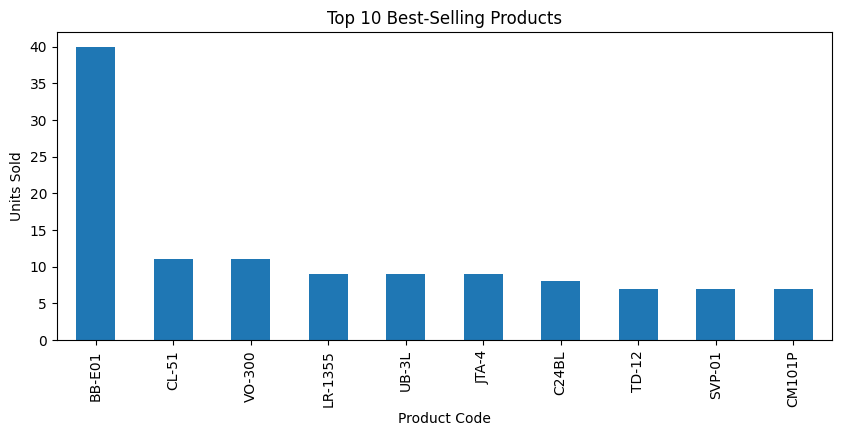

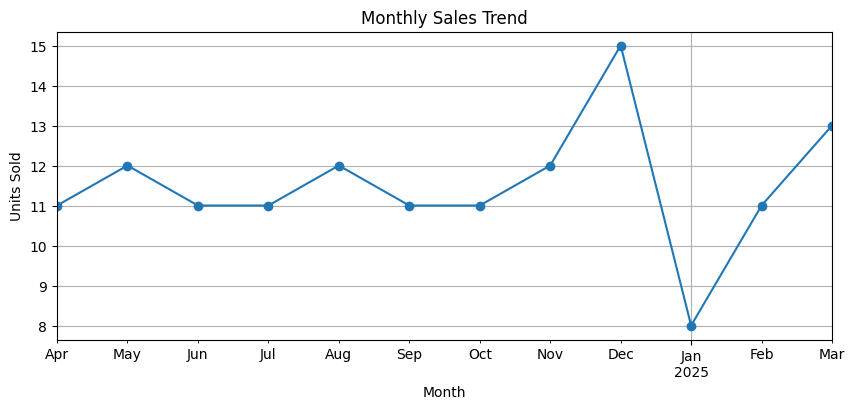

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


sales_df = pd.read_excel("Cleaned_Sales_Data.xlsx")
product_df = pd.read_excel("product data.xlsx")

print("Columns in sales data:", list(sales_df.columns))

#quantity column
sales_df["Quantity"] = 1

df = sales_df.merge(product_df, on="Product code", how="left")


# 4. POPULARITY: TOP SELLING PRODUCTS
product_popularity = df.groupby("Product code")["Quantity"].sum().sort_values(ascending=False)
print("\nTop-Selling Products:\n", product_popularity.head(10))


# 5. POPULARITY: TOP SELLING CATEGORIES
if "Category" in product_df.columns:
    category_popularity = df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
    print("\nTop Product Categories:\n", category_popularity.head(10))

# 6. TOP CUSTOMERS
top_customers = df.groupby("Customer Name")["Quantity"].sum().sort_values(ascending=False)
print("\nTop Customers:\n", top_customers.head(10))

# 7. TOP STATES
top_states = df.groupby("State")["Quantity"].sum().sort_values(ascending=False)
print("\nTop States:\n", top_states.head(10))


# 8. MONTHLY SALES TRENDS
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Quantity"].sum()

print("\nMonthly Sales Trend:\n", monthly_sales)

# 9. VISUALIZATION — TOP 10 PRODUCTS
plt.figure(figsize=(10,4))
product_popularity.head(10).plot(kind='bar')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Code")
plt.ylabel("Units Sold")
plt.show()

# 10. VISUALIZATION — MONTHLY TREND
plt.figure(figsize=(10,4))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


customer segmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt


In [ ]:
# Load Data
sales = pd.read_excel("Cleaned_Sales_Data.xlsx")
products = pd.read_excel("/content/product data.xlsx")


In [ ]:
import pandas as pd

# Load data
sales = pd.read_excel("Cleaned_Sales_Data.xlsx")

# Ensure date column is proper datetime
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Create quantity (since not in dataset)
sales['Quantity'] = 1

# Rename Credit to Total Amount
sales['Total Amount'] = sales['Credit']

# ---------------------------
# CUSTOMER LEVEL AGGREGATION
# ---------------------------
cust_grp = sales.groupby('Customer Name').agg({
    'Total Amount': 'sum',        # total money spent
    'Quantity': 'sum',            # total items bought
    'Vch No': 'nunique'           # number of invoices
}).rename(columns={
    'Total Amount': 'Total_Sales',
    'Quantity': 'Total_Qty',
    'Vch No': 'Num_Transactions'
})

# Average order value
cust_grp['Avg_Order_Value'] = cust_grp['Total_Sales'] / cust_grp['Num_Transactions']

cust_grp


,Total_Sales,Total_Qty,Num_Transactions,Avg_Order_Value
Customer Name,,,,
AIC Specialities,13500.0,1,1,13500.0
Accuracy Analabs Pvt Ltd,55000.0,1,1,55000.0
Aic Enterprises,2840.0,1,1,2840.0
Alfa Rubber & Springs Pvt Ltd,3975.0,1,1,3975.0
Altra Chemtech Pvt Limited,97800.0,3,3,32600.0
...,...,...,...,...
V.B Ceramic Consultants,140000.0,1,1,140000.0
VIJAYANI NUTRACEUTICALS PRIVATE LTD,17875.0,1,1,17875.0
VIT University,199000.0,4,4,49750.0


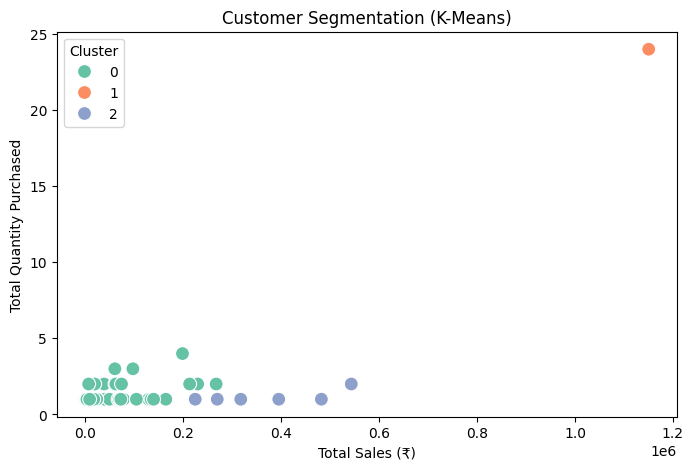

In [ ]:
#scaling
features = ['Total_Sales', 'Total_Qty', 'Num_Transactions', 'Avg_Order_Value']
scaler = StandardScaler()
scaled = scaler.fit_transform(cust_grp[features])
#k means
kmeans = KMeans(n_clusters=3, random_state=42)
cust_grp['Cluster'] = kmeans.fit_predict(scaled)
plt.figure(figsize=(8,5))
sns.scatterplot(data=cust_grp, x='Total_Sales', y='Total_Qty',
                hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segmentation (K-Means)")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Total Quantity Purchased")
plt.show()



In [ ]:
# Calculate the percentage of customers in each cluster
cluster_counts = cust_grp['Cluster'].value_counts(normalize=True) * 100

print("Percentage of Customers in Each Cluster:")
print("-" * 40)
for cluster_id, percentage in cluster_counts.items():
    print(f"Cluster {cluster_id}: {percentage:.2f}%")

Percentage of Customers in Each Cluster:
----------------------------------------
Cluster 0: 92.31%
Cluster 2: 6.59%
Cluster 1: 1.10%


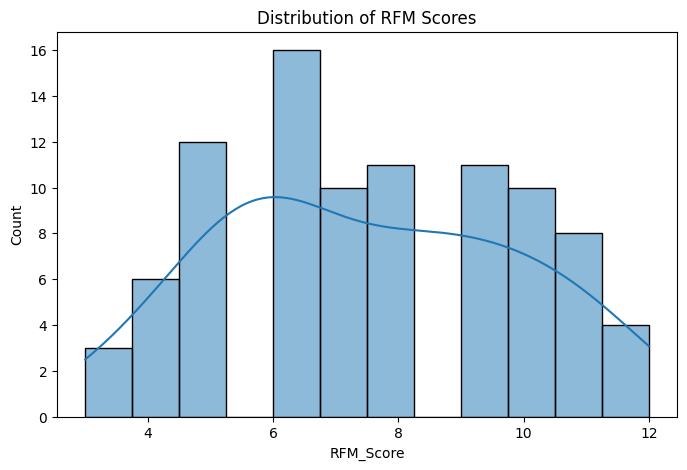

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date column is parsed
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Create placeholders if missing
sales['Quantity'] = 1
sales['Total Amount'] = sales['Credit']

# Current date
current_date = sales['Date'].max() + pd.Timedelta(days=1)

# RFM aggregation (Customer Name recommended)
rfm = sales.groupby('Customer Name').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Vch No': 'nunique',
    'Total Amount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# ------ SAFE QCUT FUNCTION (handles duplicates automatically) ------
def safe_qcut(series, q, labels_desc):
    try:
        return pd.qcut(series, q, labels=labels_desc[:q], duplicates="drop")
    except ValueError:
        # fallback: rank-based bucketing
        return pd.qcut(series.rank(method='first'), q, labels=labels_desc[:q], duplicates="drop")

# Create Scores
rfm['R_Score'] = safe_qcut(rfm['Recency'], 4, [4,3,2,1])
rfm['F_Score'] = safe_qcut(rfm['Frequency'], 4, [1,2,3,4])
rfm['M_Score'] = safe_qcut(rfm['Monetary'], 4, [1,2,3,4])

# Convert to integer
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Final RFM score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Plot
plt.figure(figsize=(8,5))
sns.histplot(rfm['RFM_Score'], bins=12, kde=True)
plt.title("Distribution of RFM Scores")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date column is parsed
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Create placeholders
sales['Quantity'] = 1
sales['Total Amount'] = sales['Credit']

# Current date
current_date = sales['Date'].max() + pd.Timedelta(days=1)

# RFM aggregation
rfm = sales.groupby('Customer Name').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Vch No': 'nunique',
    'Total Amount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']


# ------- SAFE QCUT -------
def safe_qcut(series, q, labels_desc):
    try:
        return pd.qcut(series, q, labels=labels_desc[:q], duplicates="drop")
    except ValueError:
        return pd.qcut(series.rank(method='first'), q, labels=labels_desc[:q], duplicates="drop")

# Create Scores
rfm['R_Score'] = safe_qcut(rfm['Recency'], 4, [4,3,2,1])
rfm['F_Score'] = safe_qcut(rfm['Frequency'], 4, [1,2,3,4])
rfm['M_Score'] = safe_qcut(rfm['Monetary'], 4, [1,2,3,4])

# Convert to integer
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Final RFM Score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
# ------- CUSTOMER VALUE SEGMENT -------
def classify_value(score):
    if score >= 9:
        return "High Value"
    elif score >= 6:
        return "Mid Value"
    else:
        return "Low Value"

rfm['Customer_Value_Segment'] = rfm['RFM_Score'].apply(classify_value)
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Value_Segment
Customer Name,,,,,,,,
AIC Specialities,278,1,13500.0,2,1,2,5,Low Value
Accuracy Analabs Pvt Ltd,345,1,55000.0,1,1,3,5,Low Value
Aic Enterprises,312,1,2840.0,1,1,1,3,Low Value
Alfa Rubber & Springs Pvt Ltd,173,1,3975.0,2,1,1,4,Low Value
Altra Chemtech Pvt Limited,287,3,97800.0,1,4,4,9,High Value
...,...,...,...,...,...,...,...,...
V.B Ceramic Consultants,81,1,140000.0,4,4,4,12,High Value
VIJAYANI NUTRACEUTICALS PRIVATE LTD,51,1,17875.0,4,4,2,10,High Value
VIT University,106,4,199000.0,3,4,4,11,High Value


In [ ]:
# 1. Group by segment and sum the 'Monetary' value
contribution = rfm.groupby('Customer_Value_Segment')['Monetary'].sum().reset_index()

# 2. Calculate the total revenue across all segments
total_revenue = contribution['Monetary'].sum()

# 3. Calculate the percentage share for each segment
contribution['Share (%)'] = (contribution['Monetary'] / total_revenue) * 100

# 4. Sort by Monetary value for better readability
contribution = contribution.sort_values(by='Monetary', ascending=False)

# ------------------- PRINTING -------------------
print("Contribution by Customer Segment:")
print("-" * 50)

# formatting the output
for index, row in contribution.iterrows():
    print(f"{row['Customer_Value_Segment']:<12} | "
          f"Sales: ₹{row['Monetary']:,.2f} | "
          f"Share: {row['Share (%)']:.2f}%")

print("-" * 50)
print(f"TOTAL SALES  | ₹{total_revenue:,.2f}")

Contribution by Customer Segment:
--------------------------------------------------
High Value   | Sales: ₹5,433,001.50 | Share: 78.63%
Mid Value    | Sales: ₹1,220,104.00 | Share: 17.66%
Low Value    | Sales: ₹256,223.60 | Share: 3.71%
--------------------------------------------------
TOTAL SALES  | ₹6,909,329.10


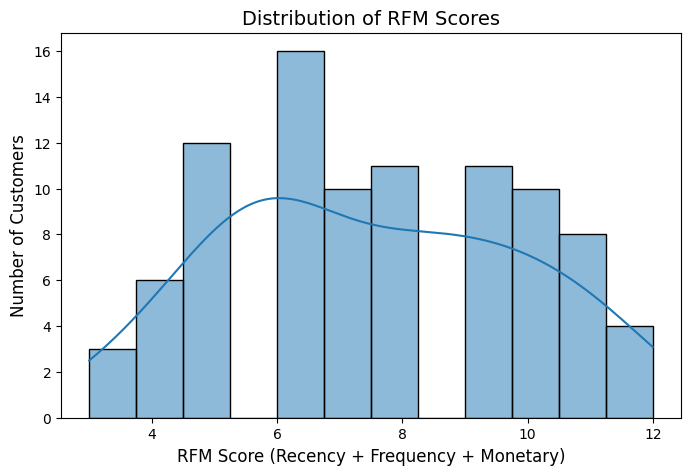

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['RFM_Score'], bins=12, kde=True)
plt.title("Distribution of RFM Scores", fontsize=14)
plt.xlabel("RFM Score (Recency + Frequency + Monetary)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

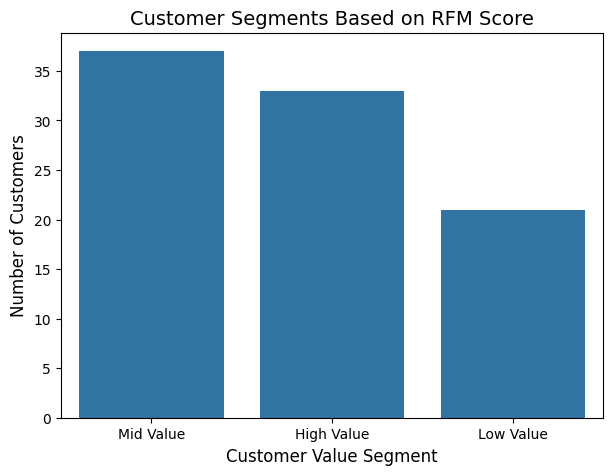

In [ ]:
# ------- PLOT 2: CUSTOMER SEGMENT BAR CHART -------
plt.figure(figsize=(7,5))
segment_counts = rfm['Customer_Value_Segment'].value_counts()

sns.barplot(x=segment_counts.index, y=segment_counts.values)

plt.title("Customer Segments Based on RFM Score", fontsize=14)
plt.xlabel("Customer Value Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)


plt.show()

In [ ]:
# Calculate percentage distribution
segment_pct = rfm['Customer_Value_Segment'].value_counts(normalize=True) * 100

print("Customer Segment Percentages:")
print("-" * 30)
for segment, pct in segment_pct.items():
    print(f"{segment}: {pct:.2f}%")

Customer Segment Percentages:
------------------------------
Mid Value: 40.66%
High Value: 36.26%
Low Value: 23.08%


In [ ]:
rfm_sort = rfm.sort_values(by='RFM_Score',ascending=False)
rfm_sort

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Value_Segment
Customer Name,,,,,,,,
Harkrish Technologies,67,2,230000.0,4,4,4,12,High Value
The Precision Scientific Co,80,2,74630.0,4,4,4,12,High Value
Indian Institute of Technology Madras,9,24,1150575.5,4,4,4,12,High Value
V.B Ceramic Consultants,81,1,140000.0,4,4,4,12,High Value
TPRS Enterprises Pvt Ltd,91,2,63000.0,4,4,3,11,High Value
...,...,...,...,...,...,...,...,...
Bannari Amman Sugars Ltd U-3,166,1,2700.0,2,1,1,4,Low Value
Jayam Scientific Company,359,1,5400.0,1,2,1,4,Low Value
ILECO,294,1,222.0,1,1,1,3,Low Value


In [ ]:
#3. TIME-SERIES ANALYSIS (MONTHLY SALES TREND)


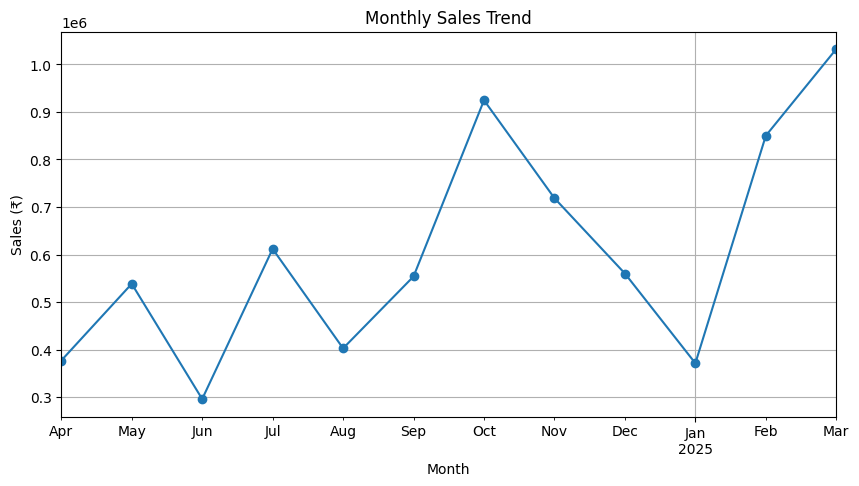

In [ ]:
sales['Month'] = sales['Date'].dt.to_period('M')
monthly = sales.groupby('Month')['Total Amount'].sum()
monthly.index = monthly.index.to_timestamp()
plt.figure(figsize=(10,5))
monthly.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales (₹)")
plt.grid(True)
plt.show()


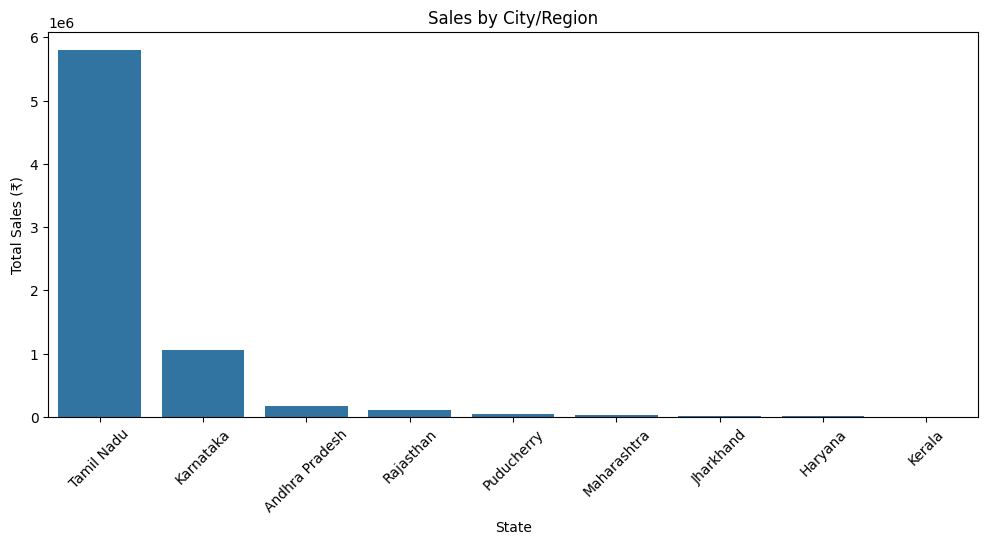

In [ ]:
geo = sales.groupby('State')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=geo.index, y=geo.values)
plt.xticks(rotation=45)
plt.title("Sales by City/Region")
plt.ylabel("Total Sales (₹)")
plt.show()



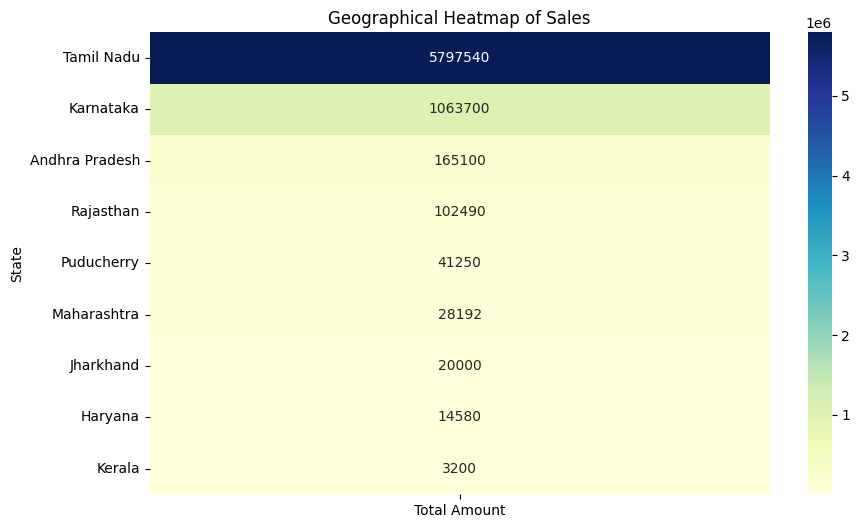

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(geo.to_frame(), annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Geographical Heatmap of Sales")
plt.show()
